In [61]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

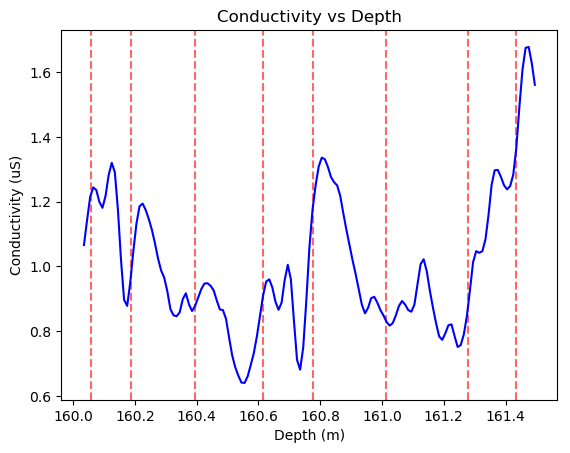

In [62]:
##DEP/Conductivity

#set bounds for depth
xlow = 160
xhigh= 161.5

#read DEP before 577m
shallow_dep = pd.read_csv('WD Layer Counting Files/DRI_0_577m_032217.txt', sep='\t')
shallow_dep = shallow_dep[shallow_dep['Cond(uS)'] > -0.7]

#pull layer count
wd_layer_count = pd.read_csv('WD2014 Layer Count.tab', comment="#", delimiter="\t", names=["Depth ice/snow [m]", "Cal age [ka BP] (ice age)", "Cal age std e [±] (ice age uncertainty due to an...)", "Cal age std e [±] (ice age uncertainty due to CH...)", "Gas age [ka BP] (gas age)", "Age e [±] (gas age uncertainty (2 sigma))",	"Age diff [ka] (gas age-ice age difference (d...)",	"Age diff e [±] (delta age uncertainty (2 sigma))"])
wd_layer_count["Cal age [ka BP] (ice age)"] = wd_layer_count["Cal age [ka BP] (ice age)"]*1000

#plotting layer count lines
for i in range(len(wd_layer_count["Depth ice/snow [m]"])):
    depth = wd_layer_count["Depth ice/snow [m]"][i]

    if wd_layer_count["Depth ice/snow [m]"][i] > xlow and wd_layer_count["Depth ice/snow [m]"][i] < xhigh:
        plt.axvline(x=depth, color='red', linestyle='dashed', alpha=0.6)
    else:
        continue

shallow_dep = shallow_dep[shallow_dep['Depth(m)'] > xlow]
shallow_dep = shallow_dep[shallow_dep['Depth(m)'] < xhigh]

#format graph

plt.title('Conductivity vs Depth')
plt.ylabel('Conductivity (uS)')
plt.xlabel('Depth (m)')

plt.plot(shallow_dep['Depth(m)'], shallow_dep['Cond(uS)'], color='blue', label='Conductivity')

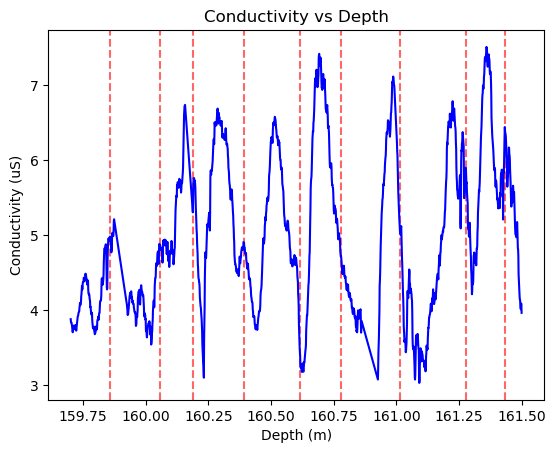

In [70]:
##DEP/Conductivity using TJ Fudge Files (TESTING WITH JUST 150-200m FIRST)

#set bounds for depth
xlow = 159.7
xhigh= 161.5

#pull the data file
with open('WD Layer Counting Files/usapdc_609591/0150R.d50') as f:
    for i, line in enumerate(f):
        if "END HEADER" in line:
            start_line = i + 1  # Start after this line
            break

read_dep = pd.read_csv('WD Layer Counting Files/usapdc_609591/0150R.d50', skiprows=start_line, header=None, delim_whitespace=True, names=["Depth(m)", "Conductance(uS)"])

#pull layer count
wd_layer_count = pd.read_csv('WD2014 Layer Count.tab', comment="#", delimiter="\t", names=["Depth ice/snow [m]", "Cal age [ka BP] (ice age)", "Cal age std e [±] (ice age uncertainty due to an...)", "Cal age std e [±] (ice age uncertainty due to CH...)", "Gas age [ka BP] (gas age)", "Age e [±] (gas age uncertainty (2 sigma))",	"Age diff [ka] (gas age-ice age difference (d...)",	"Age diff e [±] (delta age uncertainty (2 sigma))"])
wd_layer_count["Cal age [ka BP] (ice age)"] = wd_layer_count["Cal age [ka BP] (ice age)"]*1000

#plotting layer count lines
for i in range(len(wd_layer_count["Depth ice/snow [m]"])):
    depth = wd_layer_count["Depth ice/snow [m]"][i]

    if wd_layer_count["Depth ice/snow [m]"][i] > xlow and wd_layer_count["Depth ice/snow [m]"][i] < xhigh:
        plt.axvline(x=depth, color='red', linestyle='dashed', alpha=0.6)
    else:
        continue

read_dep = read_dep[read_dep['Depth(m)'] > xlow]
read_dep = read_dep[read_dep['Depth(m)'] < xhigh]

#format graph

plt.title('Conductivity vs Depth')
plt.ylabel('Conductivity (uS)')
plt.xlabel('Depth (m)')

plt.plot(read_dep['Depth(m)'], read_dep['Conductance(uS)'], color='blue', label='Conductivity')